In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
class LINEARREGRESION:
    def __init__(self):
        self.cost_list=[]
        self.weight=np.array([])
        self.epoch_list=[]
        self.accuracy=0
        self.cost=0
    

    def fit(self,X, Y, learning_rate=0.000000005, epoch=1000):
        self.X_data=X
        self.Y_data=Y
        self.n = Y.size  
        self.weight = np.zeros(X.shape[1])
        self.epoch=epoch
        self.lr=learning_rate
        
        for i in range(self.epoch):
            self.y_pred = np.dot(self.X_data, self.weight)   
            self.sub=self.y_pred - self.Y_data
            self.square = np.square(self.sub)  
            self.cost = (1 / (2 * self.n)) * np.sum(self.square)  
            
            self.gradient = (1 / self.n) * np.dot(self.X_data.T, self.y_pred - self.Y_data)  
            self.weight = self.weight - self.lr * self.gradient
            self.accuracy=1-self.cost/np.var(np.array(self.Y_data))
            print(f"Cost: {self.cost}                  Accuracy: {self.accuracy}")
            self.cost_list.append(self.cost) 
            self.epoch_list.append(i)  

    def score(self,X_TEST,Y_TEST):
        self.x_data=X_TEST
        self.y_data=Y_TEST
        self.prediction= np.dot(self.x_data,self.weight)
        self.accuracy=1-self.cost/np.var(np.array(self.y_data))
        print("\n",self.accuracy)
        
    def plot(self):
        sns.regplot(x=self.y_data,y=self.prediction)

     

In [63]:
train_data=pd.read_csv("train.csv")

array([[<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageCars'}>],
       [<Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'SalePrice'}>, <Axes: >]], dtype=object)

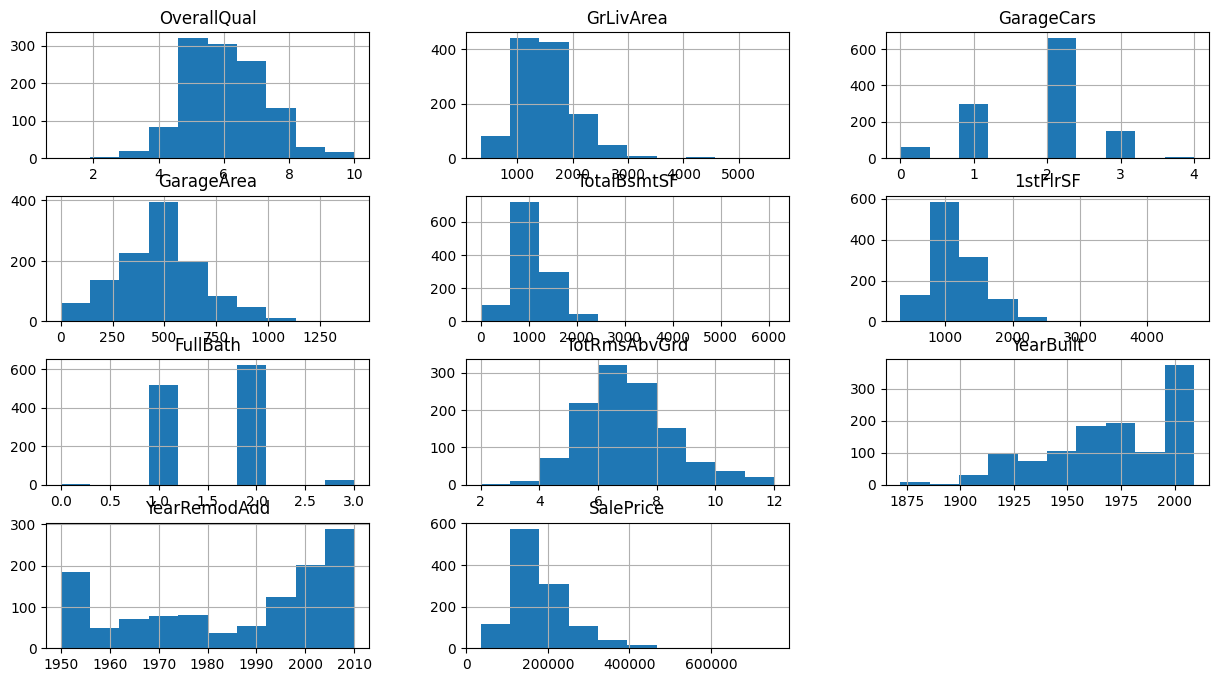

In [64]:
train_data.hist(figsize=(15,8))

In [65]:
train_data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


<Axes: >

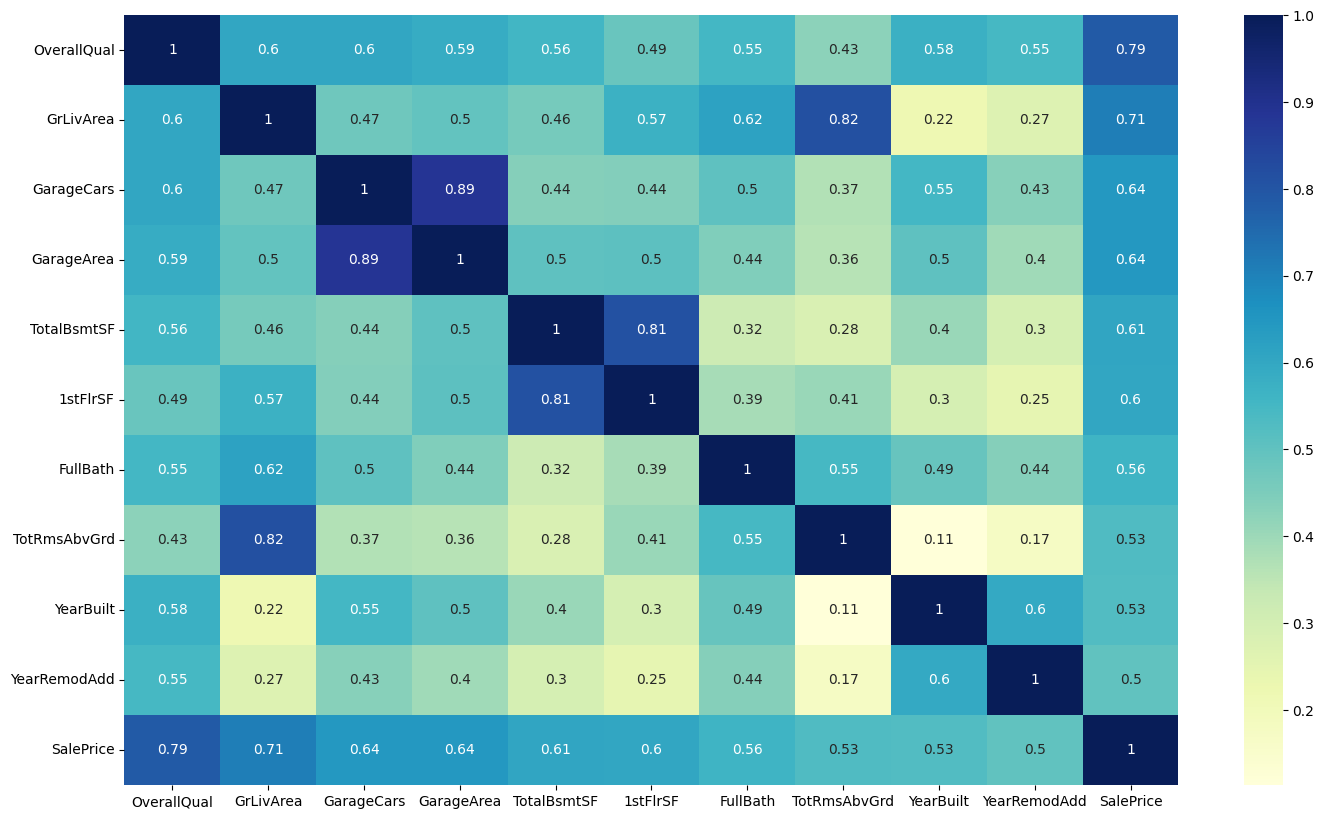

In [66]:
plt.figure(figsize=(17,10))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [67]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
x_train=train_data[["GrLivArea","TotalBsmtSF","1stFlrSF","YearBuilt"]]
y_train=train_data["SalePrice"]
reg.fit(x_train,y_train)


LinearRegression()

In [68]:
test_data=pd.read_csv("test.csv")
x_test=test_data[["GrLivArea","TotalBsmtSF","1stFlrSF","YearBuilt"]]

y_test=test_data["SalePrice"]
reg.score(x_test,y_test)

0.7432290069515581

In [69]:
x_train.shape

(1168, 4)

In [70]:
#  y_prediction = m0+m1x1+m2x2+m3x3+....
# y_prediction = matrix multi(x,m)


In [71]:
epoch=1000
learning=0.000000005


In [75]:
reg=LINEARREGRESION()
reg.fit(x_train,y_train,epoch=10000)
reg.score(x_test,y_test)

Cost: 19608941954.06892                  Accuracy: -2.075481291877274
Cost: 18044551693.16491                  Accuracy: -1.830121139765296
Cost: 16616796343.179388                  Accuracy: -1.6061909104574874
Cost: 15313736497.458141                  Accuracy: -1.4018180183810434
Cost: 14124476046.797516                  Accuracy: -1.2152935095246473
Cost: 13039071013.288837                  Accuracy: -1.0450577628696531
Cost: 12048446350.508295                  Accuracy: -0.8896874412689202
Cost: 11144320013.931526                  Accuracy: -0.7478835825931898
Cost: 10319133666.280972                  Accuracy: -0.6184607315053368
Cost: 9565989438.027584                  Accuracy: -0.5003370209296112
Cost: 8878592213.931118                  Accuracy: -0.3925251202289528
Cost: 8251196962.738808                  Accuracy: -0.2941239743550823
Cost: 7678560669.357569                  Accuracy: -0.20431126485402196
Cost: 7155898467.323148                  Accuracy: -0.12233652964936748

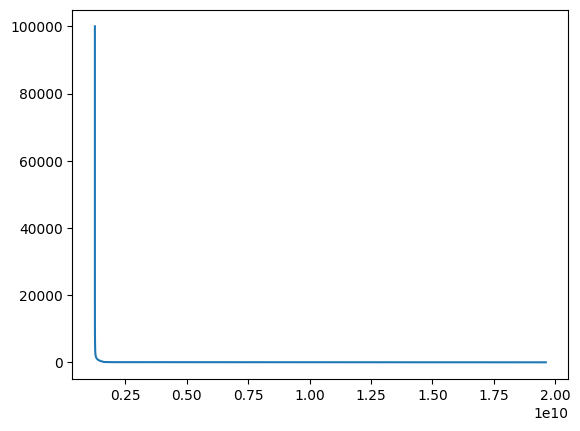

In [73]:
plt.plot(reg.cost_list,reg.epoch_list)

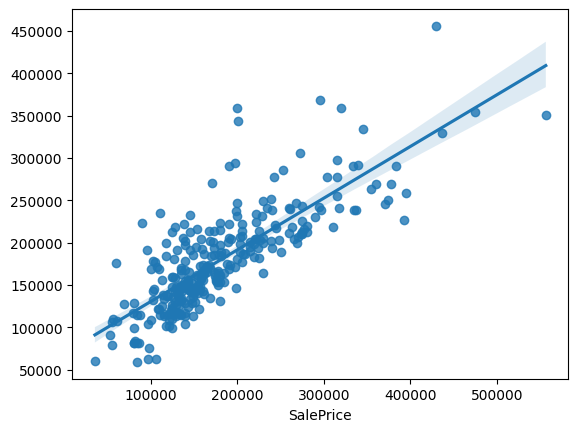

In [74]:
reg.plot()